In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-stock-price-2002-2025/Netflix Inc. (NFLX) Stock Price 2002-2025.csv


In [2]:
df = pd.read_csv("/kaggle/input/netflix-stock-price-2002-2025/Netflix Inc. (NFLX) Stock Price 2002-2025.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Feb 25, 2025",989.4,994.4,955,977.24,977.24,"4,733,000"
1,"Feb 24, 2025","1,008.00","1,015.17",984.48,988.47,988.47,"4,426,200"
2,"Feb 21, 2025","1,029.42","1,032.38",999.39,"1,003.15","1,003.15","3,738,700"
3,"Feb 20, 2025","1,042.00","1,045.00","1,015.59","1,024.54","1,024.54","3,111,800"
4,"Feb 19, 2025","1,035.18","1,045.00","1,024.51","1,043.33","1,043.33","2,600,000"


In [3]:
df.isnull().sum()

Date         0
Open         0
High         2
Low          2
Close        2
Adj Close    2
Volume       2
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,5729,5729,5727,5727,5727,5727,5727
unique,5727,4092,4114,4113,4164,4164,5560
top,"Jul 15, 2015",2.86,4.14,1.61,3.96,3.96,"14,634,900"
freq,2,14,15,16,14,14,3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5729 entries, 0 to 5728
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       5729 non-null   object
 1   Open       5729 non-null   object
 2   High       5727 non-null   object
 3   Low        5727 non-null   object
 4   Close      5727 non-null   object
 5   Adj Close  5727 non-null   object
 6   Volume     5727 non-null   object
dtypes: object(7)
memory usage: 313.4+ KB


In [7]:
df.columns = df.columns.str.strip()

In [8]:
cols_to_convert = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5729 entries, 0 to 5728
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5729 non-null   object 
 1   Open       5715 non-null   float64
 2   High       5713 non-null   float64
 3   Low        5718 non-null   float64
 4   Close      5715 non-null   float64
 5   Adj Close  5715 non-null   float64
 6   Volume     0 non-null      float64
dtypes: float64(6), object(1)
memory usage: 313.4+ KB


In [9]:
df["Date"] = pd.to_datetime(df['Date'])

In [10]:
# Fill price columns with forward-fill
df[['Open', 'High', 'Low', 'Close', 'Adj Close']] = df[['Open', 'High', 'Low', 'Close', 'Adj Close']].fillna(method='ffill')


<ipython-input-10-7afccfbcbf8d>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[['Open', 'High', 'Low', 'Close', 'Adj Close']] = df[['Open', 'High', 'Low', 'Close', 'Adj Close']].fillna(method='ffill')


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5729 entries, 0 to 5728
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5729 non-null   datetime64[ns]
 1   Open       5729 non-null   float64       
 2   High       5729 non-null   float64       
 3   Low        5729 non-null   float64       
 4   Close      5729 non-null   float64       
 5   Adj Close  5729 non-null   float64       
 6   Volume     0 non-null      float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 313.4 KB


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

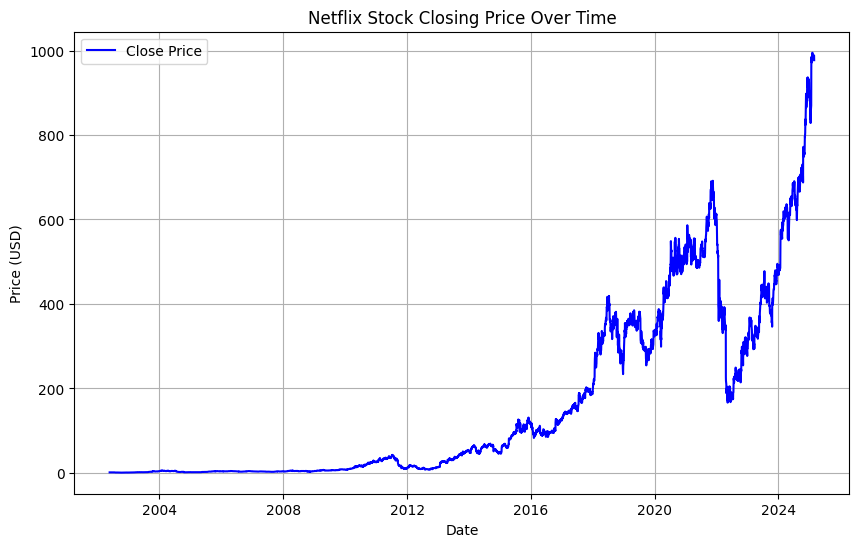

In [13]:
plt.figure(figsize=(10,6))
plt.plot(df['Date'], df['Close'], label = 'Close Price', color='blue')
plt.title("Netflix Stock Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

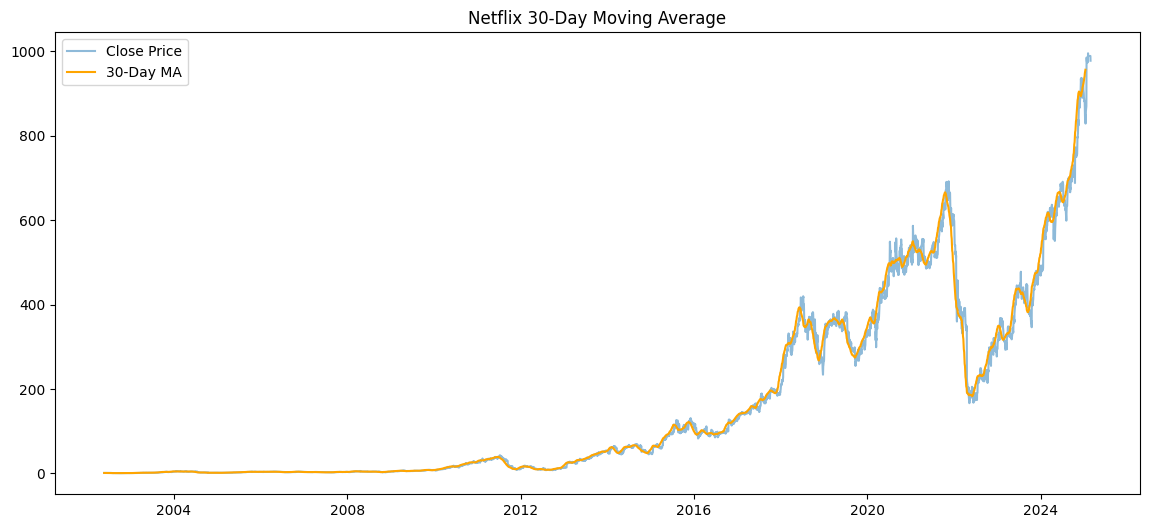

In [14]:
df['MA30'] = df["Close"].rolling(window=30).mean()

plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['Close'], label = "Close Price", alpha=0.5)
plt.plot(df['Date'], df['MA30'], label = "30-Day MA", color ='orange')
plt.title("Netflix 30-Day Moving Average")
plt.legend()
plt.show()

In [15]:
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')


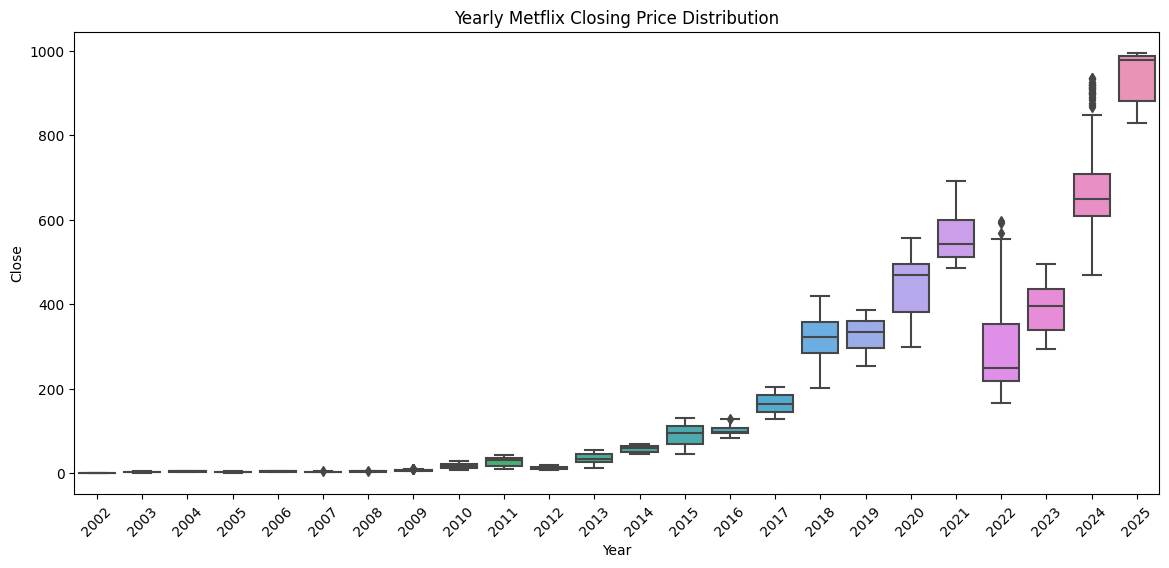

In [16]:
df['Year'] = df['Date'].dt.year

plt.figure(figsize=(14,6))
sns.boxplot(x="Year", y="Close", data=df)
plt.xticks(rotation=45)
plt.title("Yearly Metflix Closing Price Distribution")
plt.show()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5729 entries, 0 to 5728
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5729 non-null   datetime64[ns]
 1   Open       5729 non-null   float64       
 2   High       5729 non-null   float64       
 3   Low        5729 non-null   float64       
 4   Close      5729 non-null   float64       
 5   Adj Close  5729 non-null   float64       
 6   Volume     0 non-null      float64       
 7   MA30       5700 non-null   float64       
 8   Year       5729 non-null   int32         
dtypes: datetime64[ns](1), float64(7), int32(1)
memory usage: 380.6 KB


In [18]:
df['MA30'] = df['MA30'].fillna(df['MA30'].mean())


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5729 entries, 0 to 5728
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5729 non-null   datetime64[ns]
 1   Open       5729 non-null   float64       
 2   High       5729 non-null   float64       
 3   Low        5729 non-null   float64       
 4   Close      5729 non-null   float64       
 5   Adj Close  5729 non-null   float64       
 6   Volume     0 non-null      float64       
 7   MA30       5729 non-null   float64       
 8   Year       5729 non-null   int32         
dtypes: datetime64[ns](1), float64(7), int32(1)
memory usage: 380.6 KB


In [20]:
df['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100  # High-Low %
df['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100  # % Change in price


In [21]:
df['Prev_Close'] = df['Close'].shift(1)
df['Prev_Volume'] = df['Volume'].shift(1)


In [22]:
df['Rolling_Mean_7'] = df['Close'].rolling(window=7).mean()
df['Rolling_Std_7'] = df['Close'].rolling(window=7).std()


In [23]:
df['Daily_Return'] = df['Close'].pct_change()
df['Volatility_14'] = df['Daily_Return'].rolling(window=14).std()


In [24]:
df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Date,Open,High,Low,Close,Adj Close,Volume,MA30,Year,HL_PCT,PCT_change,Prev_Close,Prev_Volume,Rolling_Mean_7,Rolling_Std_7,Daily_Return,Volatility_14
0,2025-02-25,989.4,994.4,955.00,977.24,977.24,NaN,159.502165,2025,4.031763,-1.229028,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-02-24,989.4,994.4,984.48,988.47,988.47,NaN,159.502165,2025,1.003571,-0.093996,977.24,NaN,NaN,NaN,0.011492,NaN
2,2025-02-21,989.4,994.4,999.39,988.47,988.47,NaN,159.502165,2025,-0.504821,-0.093996,988.47,NaN,NaN,NaN,0.000000,NaN
3,2025-02-20,989.4,994.4,999.39,988.47,988.47,NaN,159.502165,2025,-0.504821,-0.093996,988.47,NaN,NaN,NaN,0.000000,NaN
4,2025-02-19,989.4,994.4,999.39,988.47,988.47,NaN,159.502165,2025,-0.504821,-0.093996,988.47,NaN,NaN,NaN,0.000000,NaN


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5729 entries, 0 to 5728
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            5729 non-null   datetime64[ns]
 1   Open            5729 non-null   float64       
 2   High            5729 non-null   float64       
 3   Low             5729 non-null   float64       
 4   Close           5729 non-null   float64       
 5   Adj Close       5729 non-null   float64       
 6   Volume          0 non-null      float64       
 7   MA30            5729 non-null   float64       
 8   Year            5729 non-null   int32         
 9   HL_PCT          5729 non-null   float64       
 10  PCT_change      5729 non-null   float64       
 11  Prev_Close      5728 non-null   float64       
 12  Prev_Volume     0 non-null      float64       
 13  Rolling_Mean_7  5723 non-null   float64       
 14  Rolling_Std_7   5723 non-null   float64       
 15  Dail

In [26]:
df.drop(['Volume', 'Prev_Volume'], axis=1, inplace=True)


In [27]:
df['Rolling_Mean_7'].fillna(df['Rolling_Mean_7'].mean(), inplace=True)
df['Rolling_Std_7'].fillna(df['Rolling_Std_7'].mean(), inplace=True)
df['Volatility_14'].fillna(df['Volatility_14'].mean(), inplace=True)


<ipython-input-27-fd9525f81801>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rolling_Mean_7'].fillna(df['Rolling_Mean_7'].mean(), inplace=True)
<ipython-input-27-fd9525f81801>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5729 entries, 0 to 5728
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            5729 non-null   datetime64[ns]
 1   Open            5729 non-null   float64       
 2   High            5729 non-null   float64       
 3   Low             5729 non-null   float64       
 4   Close           5729 non-null   float64       
 5   Adj Close       5729 non-null   float64       
 6   MA30            5729 non-null   float64       
 7   Year            5729 non-null   int32         
 8   HL_PCT          5729 non-null   float64       
 9   PCT_change      5729 non-null   float64       
 10  Prev_Close      5728 non-null   float64       
 11  Rolling_Mean_7  5729 non-null   float64       
 12  Rolling_Std_7   5729 non-null   float64       
 13  Daily_Return    5728 non-null   float64       
 14  Volatility_14   5729 non-null   float64       
dtypes: d

In [29]:
df['Prev_Close'].fillna(df['Prev_Close'].mean(), inplace=True)
df['Daily_Return'].fillna(df['Daily_Return'].mean(), inplace=True)

<ipython-input-29-db7016d3513d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Prev_Close'].fillna(df['Prev_Close'].mean(), inplace=True)
<ipython-input-29-db7016d3513d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5729 entries, 0 to 5728
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            5729 non-null   datetime64[ns]
 1   Open            5729 non-null   float64       
 2   High            5729 non-null   float64       
 3   Low             5729 non-null   float64       
 4   Close           5729 non-null   float64       
 5   Adj Close       5729 non-null   float64       
 6   MA30            5729 non-null   float64       
 7   Year            5729 non-null   int32         
 8   HL_PCT          5729 non-null   float64       
 9   PCT_change      5729 non-null   float64       
 10  Prev_Close      5729 non-null   float64       
 11  Rolling_Mean_7  5729 non-null   float64       
 12  Rolling_Std_7   5729 non-null   float64       
 13  Daily_Return    5729 non-null   float64       
 14  Volatility_14   5729 non-null   float64       
dtypes: d

In [31]:
from sklearn.model_selection import train_test_split

X = df[['Open', 'High', 'Low', 'HL_PCT', 'PCT_change', 'Rolling_Mean_7', 'Rolling_Std_7', 'Volatility_14']]
y = df['Close']

# Split last 20% for test
split_index = int(len(df) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


In [32]:
# Define features and target
features = ['Open', 'High', 'Low', 'HL_PCT', 'PCT_change', 
            'Rolling_Mean_7', 'Rolling_Std_7', 'Volatility_14']
target = 'Close'

X = df[features]
y = df[target]

# Time Series Split: Last 20% for testing
split_index = int(len(df) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


In [33]:
print("X shape:", X.shape)
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


X shape: (5729, 8)
Train shape: (4583, 8)
Test shape: (1146, 8)


In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_preds = lr_model.predict(X_test)

print("🔹 Linear Regression:")
print("R² Score:", r2_score(y_test, lr_preds))
print("RMSE:", mean_squared_error(y_test, lr_preds, squared=False))


🔹 Linear Regression:
R² Score: -0.18694729003499444
RMSE: 1.4288617504649863


In [35]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)

print("🔹 Random Forest:")
print("R² Score:", r2_score(y_test, rf_preds))
print("RMSE:", mean_squared_error(y_test, rf_preds, squared=False))


🔹 Random Forest:
R² Score: 0.6805931029901188
RMSE: 0.7412191632249785


In [36]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Normalize the features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Re-split with scaled data
X_train_scaled = X_scaled[:split_index]
X_test_scaled = X_scaled[split_index:]

# Reshape to 3D (samples, timesteps, features)
X_train_lstm = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Build LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train LSTM
lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, verbose=1)

# Predict
lstm_preds = lstm_model.predict(X_test_lstm)
print("🔹 LSTM:")
print("RMSE:", mean_squared_error(y_test, lstm_preds, squared=False))


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 92191.2891
Epoch 2/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 84532.4844
Epoch 3/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 82125.5312
Epoch 4/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 82379.0234
Epoch 5/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 73542.4141
Epoch 6/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 72156.5234
Epoch 7/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 68948.3516
Epoch 8/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 68937.9375
Epoch 9/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 67381.1172
Epoch 10/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 66550.5859
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
🔹 LSTM:
RMSE: 53.37554971470556


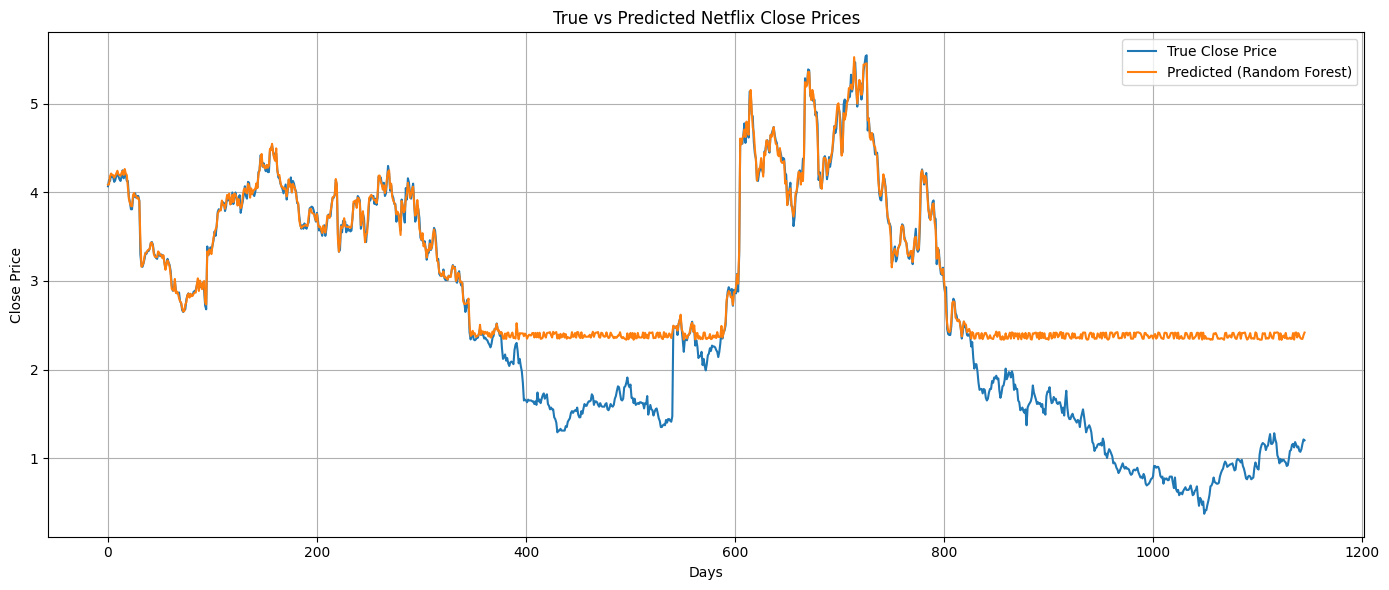

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(y_test.values, label='True Close Price')
plt.plot(rf_preds, label='Predicted (Random Forest)')
plt.title('True vs Predicted Netflix Close Prices')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [38]:
df.to_csv("cleaned_netflix_stock.csv", index=False)
